In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import pprint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import scorecardpy as sc

### Load Application and Bureau Data

In [2]:
app_data = pd.read_csv('application_data.csv')
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [3]:
bureau_data = pd.read_csv("bureau_data.csv")
bureau_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


## 1. Data Exploration

- graphically show the organization types counplot
- graphically show age ranges countplot
- distribution graphs??

## 2. Data Preparation

### Select Columns and Filter Out Self-Employed & Age (application_data.csv)


In [4]:
# list of selected cols from applicate_data.csv
selected_cols_application = ["SK_ID_CURR", 
                              "TARGET",
                              "FLAG_OWN_CAR",
                              "FLAG_OWN_REALTY",
                              "CNT_CHILDREN",
                              "AMT_INCOME_TOTAL",
                              "AMT_CREDIT",
                              "AMT_ANNUITY",
                              "AMT_GOODS_PRICE",
                              "NAME_INCOME_TYPE",
                              "NAME_EDUCATION_TYPE",
                              "NAME_FAMILY_STATUS",
                              "NAME_HOUSING_TYPE",
                              "REGION_POPULATION_RELATIVE",
                              "DAYS_BIRTH",
                              "DAYS_EMPLOYED",
                              "DAYS_REGISTRATION",
                              "DAYS_ID_PUBLISH",
                              "OWN_CAR_AGE",
                              "OCCUPATION_TYPE",
                              "CNT_FAM_MEMBERS",
                              "REGION_RATING_CLIENT",
                              "REGION_RATING_CLIENT_W_CITY",
                              "EXT_SOURCE_1",
                              "EXT_SOURCE_2",
                              "EXT_SOURCE_3",
                              "OBS_30_CNT_SOCIAL_CIRCLE",
                              "DEF_30_CNT_SOCIAL_CIRCLE",
                              "OBS_60_CNT_SOCIAL_CIRCLE",
                              "DEF_60_CNT_SOCIAL_CIRCLE",
                              "AMT_REQ_CREDIT_BUREAU_HOUR",
                              "AMT_REQ_CREDIT_BUREAU_DAY",
                              "AMT_REQ_CREDIT_BUREAU_WEEK",
                              "AMT_REQ_CREDIT_BUREAU_MON",
                              "AMT_REQ_CREDIT_BUREAU_QRT",
                              "AMT_REQ_CREDIT_BUREAU_YEAR"]

# extract selected columns and filter by self-employed
filtered_app_data = app_data[app_data['ORGANIZATION_TYPE'] == 'Self-employed'][selected_cols_application]
filtered_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38412 entries, 13 to 307504
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   38412 non-null  int64  
 1   TARGET                       38412 non-null  int64  
 2   FLAG_OWN_CAR                 38412 non-null  object 
 3   FLAG_OWN_REALTY              38412 non-null  object 
 4   CNT_CHILDREN                 38412 non-null  int64  
 5   AMT_INCOME_TOTAL             38412 non-null  float64
 6   AMT_CREDIT                   38412 non-null  float64
 7   AMT_ANNUITY                  38409 non-null  float64
 8   AMT_GOODS_PRICE              38360 non-null  float64
 9   NAME_INCOME_TYPE             38412 non-null  object 
 10  NAME_EDUCATION_TYPE          38412 non-null  object 
 11  NAME_FAMILY_STATUS           38412 non-null  object 
 12  NAME_HOUSING_TYPE            38412 non-null  object 
 13  REGION_POPULATION_R

In [5]:
# create AGE variable using DAYS_BIRTH
filtered_app_data['AGE'] = filtered_app_data['DAYS_BIRTH']/-365
filtered_app_data['AGE'] = filtered_app_data['AGE'].astype(int)

# drop DAYS_BIRTH variables - no longer needed since AGE already exists
filtered_app_data.drop("DAYS_BIRTH", axis=1, inplace=True)

In [6]:
# Select records with applicants aged between 18 and 35
filtered_app_data = filtered_app_data[(filtered_app_data["AGE"] >= 18) & (filtered_app_data["AGE"] <= 35)]

In [7]:
# Select records with applicants with credit amount < 500k
filtered_app_data = filtered_app_data[(filtered_app_data["AMT_CREDIT"] <= 500000)]
filtered_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8271 entries, 22 to 307457
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   8271 non-null   int64  
 1   TARGET                       8271 non-null   int64  
 2   FLAG_OWN_CAR                 8271 non-null   object 
 3   FLAG_OWN_REALTY              8271 non-null   object 
 4   CNT_CHILDREN                 8271 non-null   int64  
 5   AMT_INCOME_TOTAL             8271 non-null   float64
 6   AMT_CREDIT                   8271 non-null   float64
 7   AMT_ANNUITY                  8271 non-null   float64
 8   AMT_GOODS_PRICE              8249 non-null   float64
 9   NAME_INCOME_TYPE             8271 non-null   object 
 10  NAME_EDUCATION_TYPE          8271 non-null   object 
 11  NAME_FAMILY_STATUS           8271 non-null   object 
 12  NAME_HOUSING_TYPE            8271 non-null   object 
 13  REGION_POPULATION_RE

In [8]:
# identify columns with NULL values
filtered_app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  22
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                    5447
OCCUPATION_TYPE                 739
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
EXT_SOURCE_1                   3570
EXT_SOURCE_2                     19
EXT_SOURCE_3                   2456
OBS_30_CNT_SOCIAL_CIRCLE         35
DEF_30_CNT_SOCIAL_CIRCLE         35
OBS_60_CNT_SOCIAL_CIRCLE    

### Select Columns (bureau_data.csv)

In [9]:
# list selected columns
selected_cols_bureau = ["SK_ID_CURR",
                        "SK_ID_BUREAU",
                        "AMT_CREDIT_MAX_OVERDUE",
                        "CNT_CREDIT_PROLONG",
                        "AMT_CREDIT_SUM",
                        "AMT_CREDIT_SUM_DEBT",
                        "AMT_CREDIT_SUM_LIMIT",
                        "AMT_CREDIT_SUM_OVERDUE"]

# extract selected columns of bureau data
filtered_bureau_data = bureau_data[selected_cols_bureau]
filtered_bureau_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   AMT_CREDIT_MAX_OVERDUE  float64
 3   CNT_CREDIT_PROLONG      int64  
 4   AMT_CREDIT_SUM          float64
 5   AMT_CREDIT_SUM_DEBT     float64
 6   AMT_CREDIT_SUM_LIMIT    float64
 7   AMT_CREDIT_SUM_OVERDUE  float64
dtypes: float64(5), int64(3)
memory usage: 104.8 MB


### Join Application and Bureau Data

In [10]:
filtered_bureau_data.groupby("SK_ID_CURR").count()

,SK_ID_BUREAU,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
SK_ID_CURR,,,,,,,
100001,7,0,7,7,7,6,7
100002,8,5,8,8,5,4,8
100003,4,4,4,4,4,4,4
100004,2,1,2,2,2,2,2
100005,3,1,3,3,3,3,3
...,...,...,...,...,...,...,...
456249,13,5,13,13,10,7,13
456250,3,2,3,3,3,3,3
456253,4,0,4,4,4,4,4


In [11]:
# left join
unclean_merged_data = filtered_app_data.merge(filtered_bureau_data, how="left", on="SK_ID_CURR")
unclean_merged_data

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,SK_ID_BUREAU,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
0,100026,0,N,N,1,450000.0,497520.0,32521.5,450000.0,Working,...,0.0,5.0,30,5103096.0,NaN,0.0,2700000.0,2542576.50,0.0,0.0
1,100026,0,N,N,1,450000.0,497520.0,32521.5,450000.0,Working,...,0.0,5.0,30,5103097.0,NaN,0.0,1575000.0,NaN,NaN,0.0
2,100026,0,N,N,1,450000.0,497520.0,32521.5,450000.0,Working,...,0.0,5.0,30,5103098.0,0.0,0.0,1350000.0,935237.88,0.0,0.0
3,100041,0,N,N,0,112500.0,450000.0,44509.5,450000.0,Working,...,0.0,0.0,33,5325221.0,0.0,0.0,180000.0,0.00,0.0,0.0
4,100041,0,N,N,0,112500.0,450000.0,44509.5,450000.0,Working,...,0.0,0.0,33,5325230.0,0.0,0.0,103504.5,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29959,456196,0,N,Y,2,202500.0,360000.0,18000.0,360000.0,Commercial associate,...,0.0,1.0,35,6799863.0,NaN,0.0,59310.0,0.00,NaN,0.0
29960,456196,0,N,Y,2,202500.0,360000.0,18000.0,360000.0,Commercial associate,...,0.0,1.0,35,6799864.0,NaN,0.0,27279.0,0.00,NaN,0.0
29961,456196,0,N,Y,2,202500.0,360000.0,18000.0,360000.0,Commercial associate,...,0.0,1.0,35,6799865.0,NaN,0.0,84960.0,0.00,NaN,0.0
29962,456196,0,N,Y,2,202500.0,360000.0,18000.0,360000.0,Commercial associate,...,0.0,1.0,35,6799866.0,NaN,0.0,51475.5,NaN,NaN,0.0


In [12]:
unclean_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29964 entries, 0 to 29963
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   29964 non-null  int64  
 1   TARGET                       29964 non-null  int64  
 2   FLAG_OWN_CAR                 29964 non-null  object 
 3   FLAG_OWN_REALTY              29964 non-null  object 
 4   CNT_CHILDREN                 29964 non-null  int64  
 5   AMT_INCOME_TOTAL             29964 non-null  float64
 6   AMT_CREDIT                   29964 non-null  float64
 7   AMT_ANNUITY                  29964 non-null  float64
 8   AMT_GOODS_PRICE              29901 non-null  float64
 9   NAME_INCOME_TYPE             29964 non-null  object 
 10  NAME_EDUCATION_TYPE          29964 non-null  object 
 11  NAME_FAMILY_STATUS           29964 non-null  object 
 12  NAME_HOUSING_TYPE            29964 non-null  object 
 13  REGION_POPULATIO

In [13]:
# identiy columns with null values
unclean_merged_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                   63
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                    18341
OCCUPATION_TYPE                 2686
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
EXT_SOURCE_1                   11905
EXT_SOURCE_2                      39
EXT_SOURCE_3                    3345
OBS_30_CNT_SOCIAL_CIRCLE         100
DEF_30_CNT_SOCIAL_CIRCLE         100
O

### Data Cleaning

### Filling NA Data

To address missing numerical values, the team checked for any missing data and any meaningful or meaningless 0 or null values to decide how to address them.

In [14]:
# replace missing cells of numerical columns that do not have meaningless 0 with median
numerical_cols = ["OBS_30_CNT_SOCIAL_CIRCLE", 
                  "DEF_30_CNT_SOCIAL_CIRCLE", 
                  "OBS_60_CNT_SOCIAL_CIRCLE", 
                  "DEF_60_CNT_SOCIAL_CIRCLE"]

filtered_app_data[numerical_cols] = filtered_app_data[numerical_cols].fillna(filtered_app_data[numerical_cols].median())

In [15]:
# replace missing cells of EXT_SOURCE with 0
ext_source_cols = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
filtered_app_data[ext_source_cols] = filtered_app_data[ext_source_cols].fillna(0)

In [16]:
# Check if all rows where FLAG_OWN_CAR = "N" have missing values for OWN_CAR_AGE

# Count number of missing data for OWN_CAR_AGE
current_missing_count = filtered_app_data[['OWN_CAR_AGE']].isnull().sum()

# Count number of people who dont own car (FLAG_OWN_CAR == "N")
sum_of_own_car_N = (filtered_app_data['FLAG_OWN_CAR'] == 'N').sum()

# Count number of people who don't own car and have missing OWN_CAR_AGE
total_no_car_and_age = filtered_app_data.loc[filtered_app_data['FLAG_OWN_CAR'] == 'N', 'OWN_CAR_AGE'].isnull().sum()

# Compare numbers
if  current_missing_count.to_numpy() == sum_of_own_car_N == total_no_car_and_age:
    print(True)
else:
    print(False)

True


In [17]:
# replace missing cells of OWN_CAR_AGE with "Missing"
filtered_app_data["OWN_CAR_AGE"].fillna('Missing', inplace=True)
filtered_app_data.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,8271.000000,8271.000000,8271.000000,8.271000e+03,8271.000000,8271.000000,8249.000000,8271.000000,8271.000000,8271.000000,...,8271.000000,8271.000000,8271.000000,6510.000000,6510.000000,6510.000000,6510.000000,6510.000000,6510.000000,8271.000000
mean,279165.238786,0.131423,0.635232,1.371260e+05,282483.893362,18766.033732,257428.813856,0.018087,-1397.099625,-3790.973643,...,0.173377,1.499214,0.121025,0.007220,0.009063,0.039017,0.185868,0.258372,1.901536,29.098295
std,102714.457635,0.337883,0.801487,6.443407e+04,113745.546504,9029.094097,107371.018144,0.010514,1013.962660,2583.482502,...,0.483260,2.322013,0.387197,0.088222,0.121739,0.216854,0.671742,0.604868,1.832093,3.812934
min,100026.000000,0.000000,0.000000,2.925000e+04,45000.000000,2317.500000,40500.000000,0.000938,-6167.000000,-13044.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,191556.000000,0.000000,0.000000,9.000000e+04,180000.000000,12204.000000,180000.000000,0.009175,-1895.000000,-5215.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000
50%,279151.000000,0.000000,0.000000,1.305000e+05,270000.000000,17127.000000,225000.000000,0.018209,-1157.000000,-3671.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000
75%,367843.500000,0.000000,1.000000,1.575000e+05,364896.000000,23562.000000,315000.000000,0.025164,-632.000000,-1611.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,32.000000
max,456196.000000,1.000000,8.000000,1.350000e+06,499500.000000,59175.000000,499500.000000,0.072508,-28.000000,0.000000,...,5.000000,22.000000,4.000000,2.000000,4.000000,5.000000,17.000000,6.000000,19.000000,35.000000


In [18]:
# replace missing cells of numerical columns that do not have meaningless 0 with median

# numerical_cols = unclean_merged_data.select_dtypes(include=['float', 'int']).columns
# unclean_merged_data[numerical_cols] = unclean_merged_data[numerical_cols].fillna(unclean_merged_data[numerical_cols].median())
# unclean_merged_data.fillna('Missing', inplace=True)
# unclean_merged_data.describe()


### Identifying Outliers

To address outliers, our team identified extreme outliers and used business reasons to decide whether to keep, replace, or delete the outliers

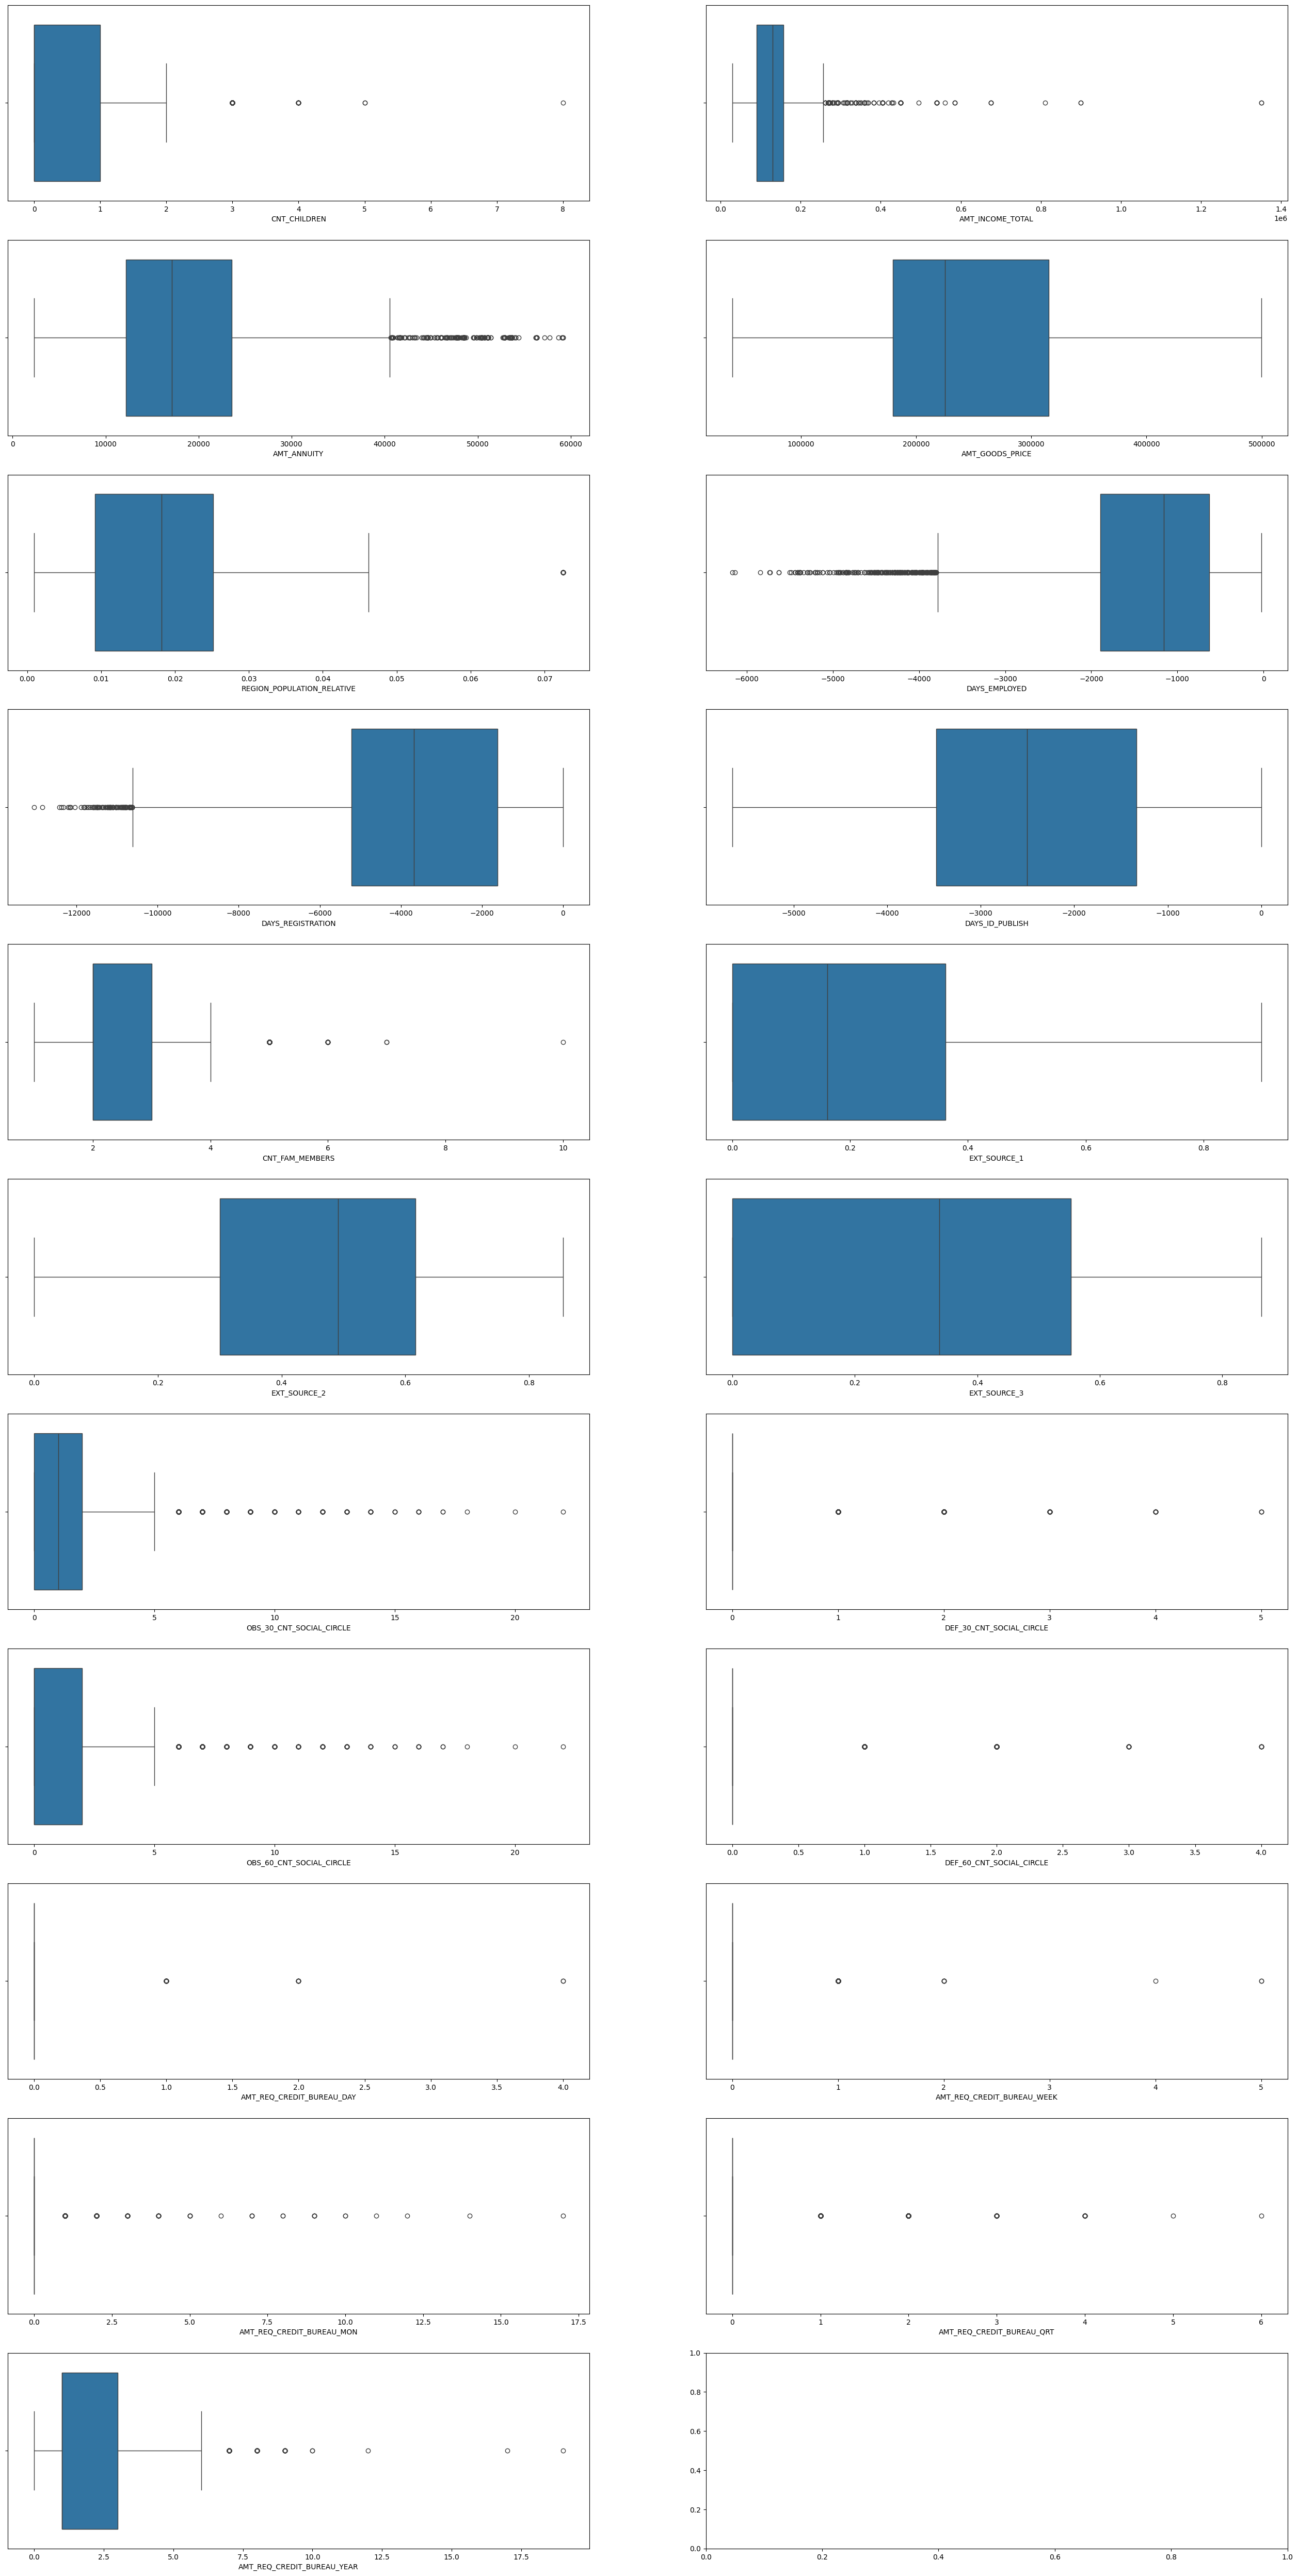

In [19]:
# sample code
# Variables not included due to non-numerical values involved or low numerical values:
    # Categorical values - "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE",

    # OWN_CAR_AGE can't be analysed due to data cells with "Missing"

    # Limit set on values - AGE and AMT_CREDIT

    # Low values - "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "AMT_REQ_CREDIT_BUREAU_HOUR",

# create boxplots
large_numeric_var = [
                "CNT_CHILDREN",
                "AMT_INCOME_TOTAL",
                "AMT_ANNUITY",
                "AMT_GOODS_PRICE",
                "REGION_POPULATION_RELATIVE",
                "DAYS_EMPLOYED",
                "DAYS_REGISTRATION",
                "DAYS_ID_PUBLISH",
                "CNT_FAM_MEMBERS",
                "EXT_SOURCE_1",
                "EXT_SOURCE_2",
                "EXT_SOURCE_3",
                "OBS_30_CNT_SOCIAL_CIRCLE",
                "DEF_30_CNT_SOCIAL_CIRCLE",
                "OBS_60_CNT_SOCIAL_CIRCLE",
                "DEF_60_CNT_SOCIAL_CIRCLE",
                "AMT_REQ_CREDIT_BUREAU_DAY",
                "AMT_REQ_CREDIT_BUREAU_WEEK",
                "AMT_REQ_CREDIT_BUREAU_MON",
                "AMT_REQ_CREDIT_BUREAU_QRT",
                "AMT_REQ_CREDIT_BUREAU_YEAR"]

row_count=int(np.ceil(len(large_numeric_var)/2))

# create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=filtered_app_data, x = large_numeric_var[i],orient='h')
    axis.set_xlabel(str(large_numeric_var[i]))
    if i == len(large_numeric_var)-1: 
         break

# Show the plot
plt.show()


<Axes: >

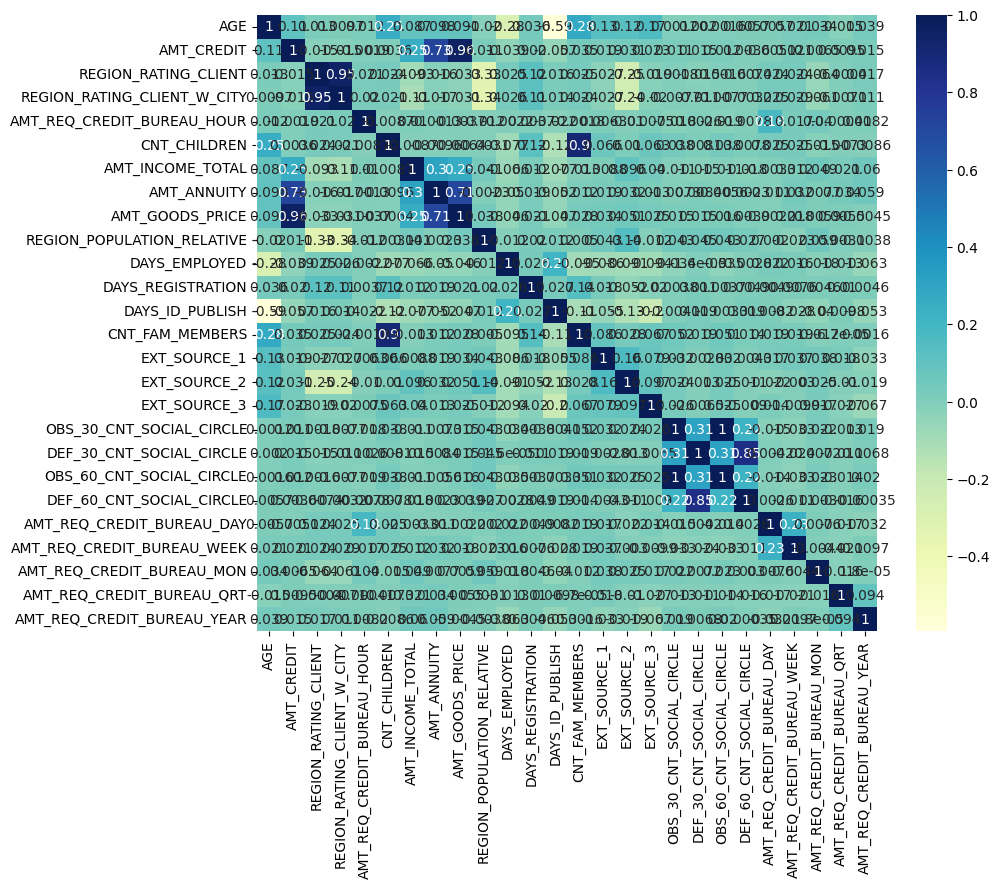

In [20]:
# sample code 
# OWN_CAR_AGE can't be analysed due to data cells with "Missing"

    # Limit set on values - AGE and AMT_CREDIT

    # Low values - "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "AMT_REQ_CREDIT_BUREAU_HOUR",

# create boxplots
# generate correlation maxtrix
numerical_cols = ["AMT_CREDIT",
                "CNT_CHILDREN",
                "AMT_INCOME_TOTAL",
                "AMT_ANNUITY",
                "AMT_GOODS_PRICE",
                "REGION_POPULATION_RELATIVE",
                "DAYS_EMPLOYED",
                "DAYS_REGISTRATION",
                "DAYS_ID_PUBLISH",
                "CNT_FAM_MEMBERS",
                "EXT_SOURCE_1",
                "EXT_SOURCE_2",
                "EXT_SOURCE_3",
                "OBS_30_CNT_SOCIAL_CIRCLE",
                "DEF_30_CNT_SOCIAL_CIRCLE",
                "OBS_60_CNT_SOCIAL_CIRCLE",
                "DEF_60_CNT_SOCIAL_CIRCLE",
                "AMT_REQ_CREDIT_BUREAU_HOUR",
                "AMT_REQ_CREDIT_BUREAU_DAY",
                "AMT_REQ_CREDIT_BUREAU_WEEK",
                "AMT_REQ_CREDIT_BUREAU_MON",
                "AMT_REQ_CREDIT_BUREAU_QRT",
                "AMT_REQ_CREDIT_BUREAU_YEAR"]
cor = filtered_app_data[numerical_cols].corr()

# plot heat map
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu", ax=ax)

### Export To CSV

In [21]:
# filtered_data.to_csv("processed_data.csv")

In [22]:
# identify columns with missing values

# numerical_cols = unclean_merged_data.select_dtypes(include=['float', 'int']).columns
# unclean_merged_data[numerical_cols] = unclean_merged_data[numerical_cols].fillna(unclean_merged_data[numerical_cols].median())
# unclean_merged_data.fillna('Missing', inplace=True)
unclean_merged_data.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,SK_ID_BUREAU,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
count,29964.000000,29964.000000,29964.000000,2.996400e+04,29964.000000,29964.000000,29901.000000,29964.000000,29964.000000,29964.000000,...,28203.000000,28203.000000,29964.000000,2.815500e+04,1.153200e+04,28155.000000,2.815500e+04,2.471000e+04,1.921800e+04,2.815500e+04
mean,278654.598618,0.115973,0.684054,1.468095e+05,288697.058020,18990.946135,264297.006321,0.017947,-1544.119110,-3773.505774,...,0.264369,1.935255,29.816814,5.961827e+06,2.727047e+03,0.007317,2.541599e+05,1.091021e+05,5.714687e+03,1.372268e+02
std,102955.601253,0.320197,0.818183,7.364642e+04,114936.603978,8927.127738,110420.393887,0.010245,1087.159986,2593.172948,...,0.617421,1.817636,3.522995,5.468768e+05,2.900056e+04,0.100876,6.758199e+05,5.182334e+05,3.812886e+04,1.049969e+04
min,100026.000000,0.000000,0.000000,2.925000e+04,45000.000000,2317.500000,40500.000000,0.000938,-6167.000000,-13044.000000,...,0.000000,0.000000,20.000000,5.000316e+06,0.000000e+00,0.000000,0.000000e+00,-1.904153e+05,-1.528701e+05,0.000000e+00
25%,191274.000000,0.000000,0.000000,1.035000e+05,199152.000000,12672.000000,180000.000000,0.009175,-2170.000000,-5243.000000,...,0.000000,1.000000,27.000000,5.476764e+06,0.000000e+00,0.000000,3.941100e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,277171.000000,0.000000,0.000000,1.350000e+05,270000.000000,17500.500000,238500.000000,0.018029,-1296.000000,-3690.000000,...,0.000000,2.000000,30.000000,5.981032e+06,0.000000e+00,0.000000,8.949600e+04,0.000000e+00,0.000000e+00,0.000000e+00
75%,368460.250000,0.000000,1.000000,1.800000e+05,382500.000000,23602.500000,337500.000000,0.025164,-700.000000,-1533.000000,...,0.000000,3.000000,33.000000,6.455206e+06,0.000000e+00,0.000000,2.024815e+05,3.440588e+04,0.000000e+00,0.000000e+00
max,456196.000000,1.000000,8.000000,1.350000e+06,499500.000000,59175.000000,499500.000000,0.072508,-28.000000,0.000000,...,6.000000,19.000000,35.000000,6.843184e+06,2.327828e+06,3.000000,2.340000e+07,1.721141e+07,1.969291e+06,1.329597e+06


### Calculating IVs for all columns



In [23]:
bins = sc.woebin(unclean_merged_data,y='TARGET')

[INFO] creating woe binning ...


{'REGION_RATING_CLIENT': <Figure size 640x480 with 2 Axes>,
 'OCCUPATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'REGION_POPULATION_RELATIVE': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 640x480 with 2 Axes>,
 'FLAG_OWN_CAR': <Figure size 640x480 with 2 Axes>,
 'AMT_GOODS_PRICE': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_3': <Figure size 640x480 with 2 Axes>,
 'AMT_ANNUITY': <Figure size 640x480 with 2 Axes>,
 'AGE': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT_SUM_OVERDUE': <Figure size 640x480 with 2 Axes>,
 'OBS_30_CNT_SOCIAL_CIRCLE': <Figure size 640x480 with 2 Axes>,
 'DEF_30_CNT_SOCIAL_CIRCLE': <Figure size 640x480 with 2 Axes>,
 'DAYS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'AMT_REQ_CREDIT_BUREAU_QRT': <Figure size 640x480 with 2 Axes>,
 'CNT_CREDIT_PROLONG': <Figure size 640x480 with 2 Axes>,
 'AMT_REQ_CREDIT_BUREAU_WEEK': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'SK_ID_CURR': <Figure 

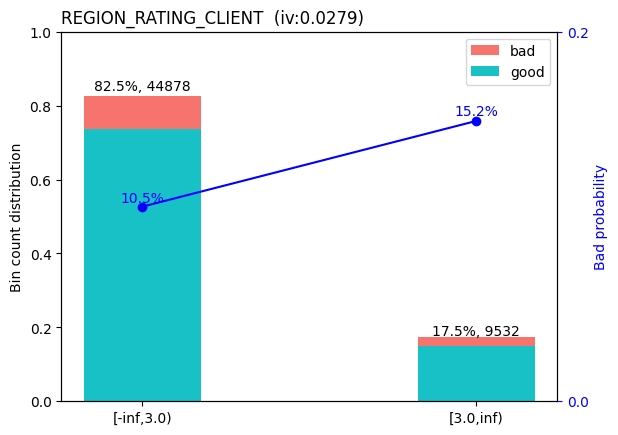

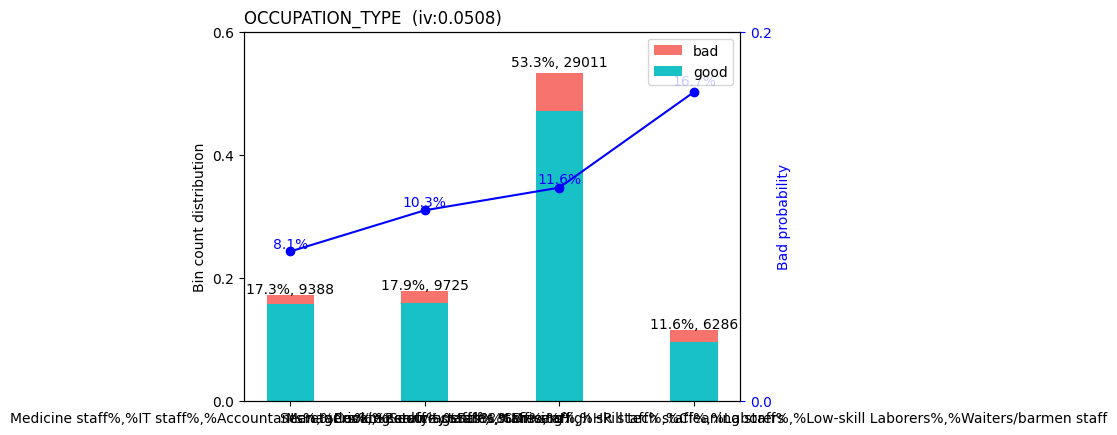

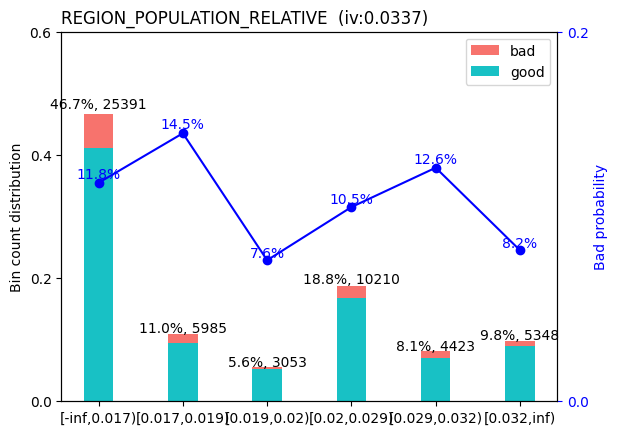

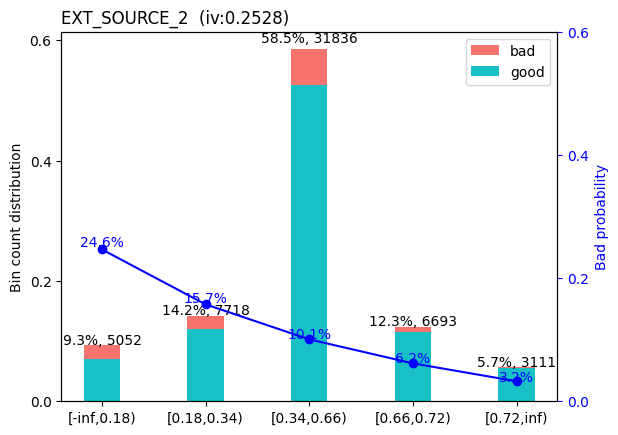

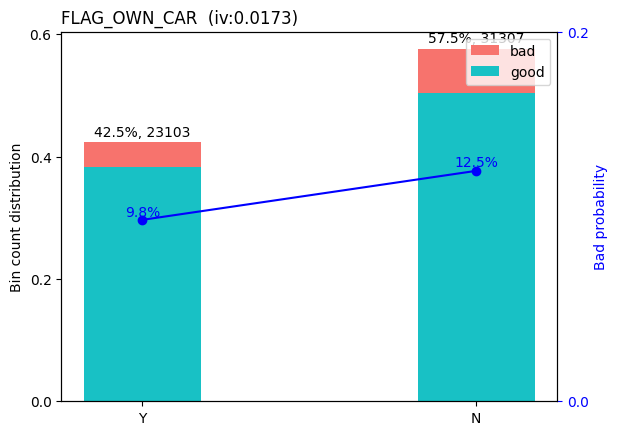

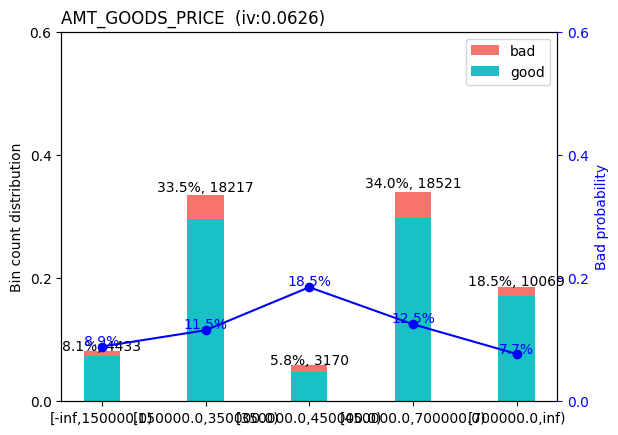

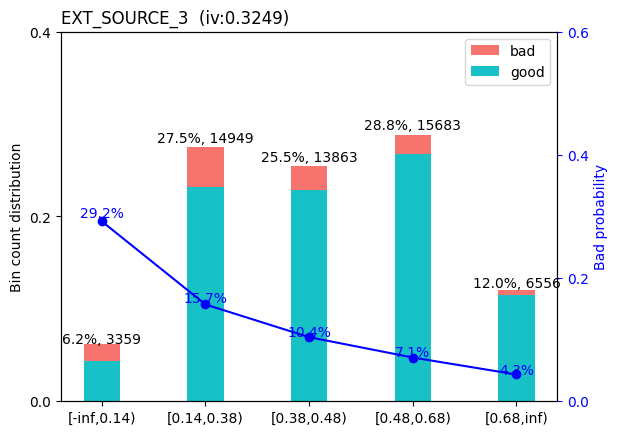

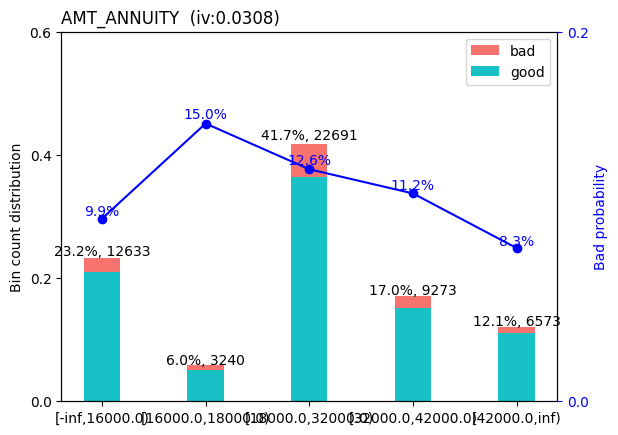

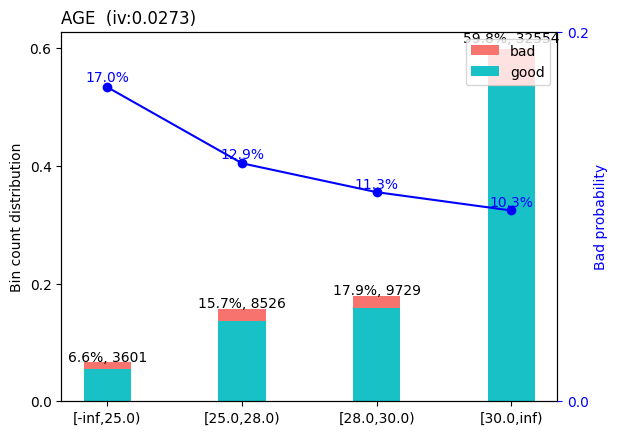

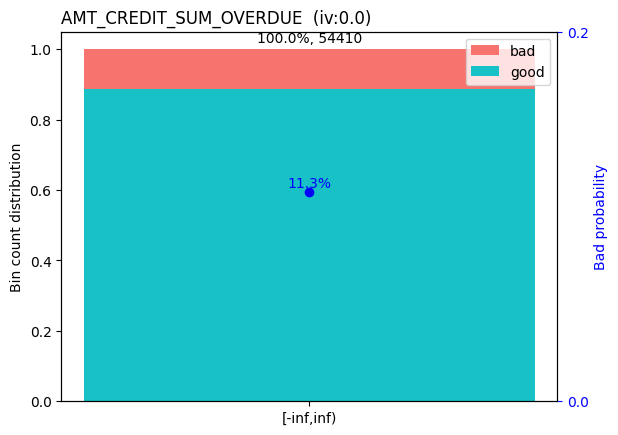

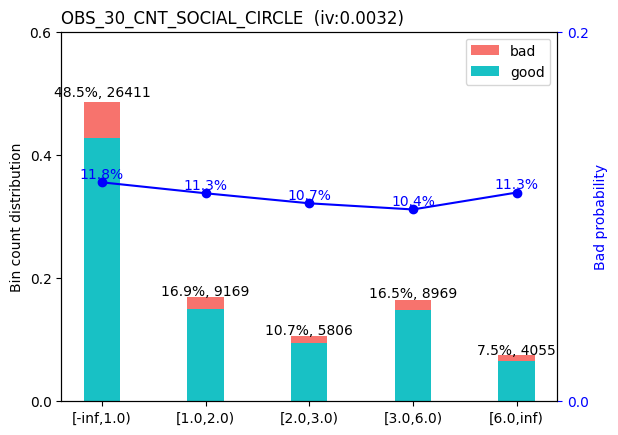

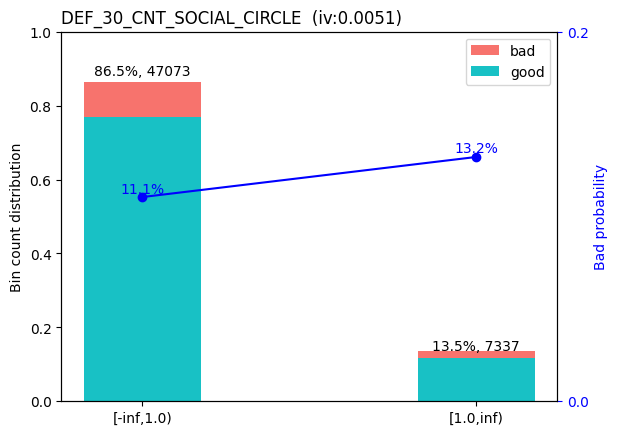

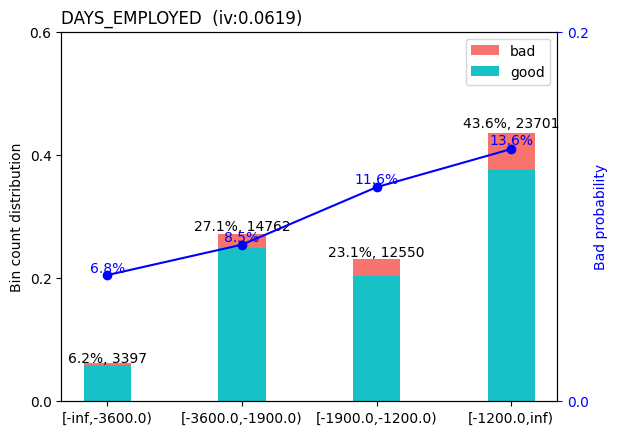

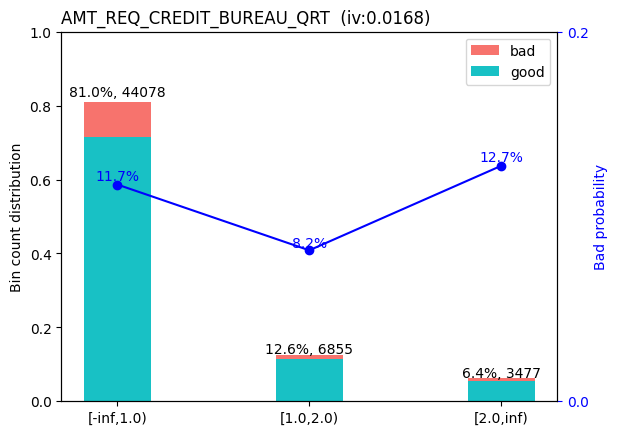

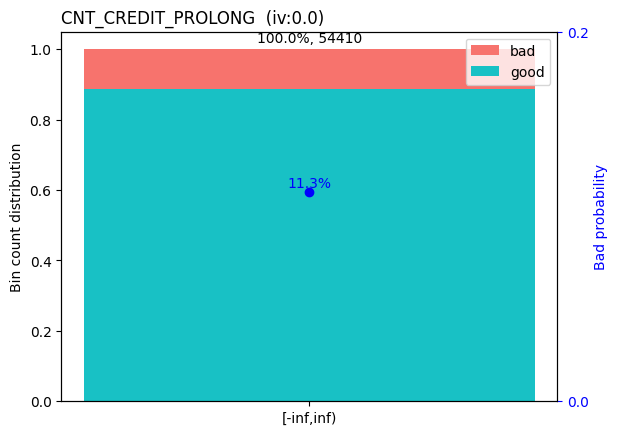

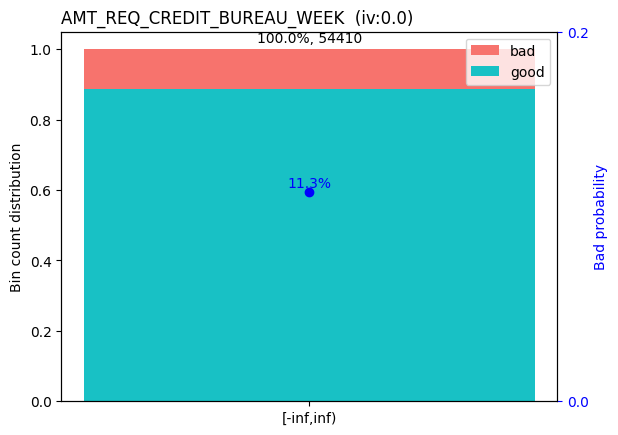

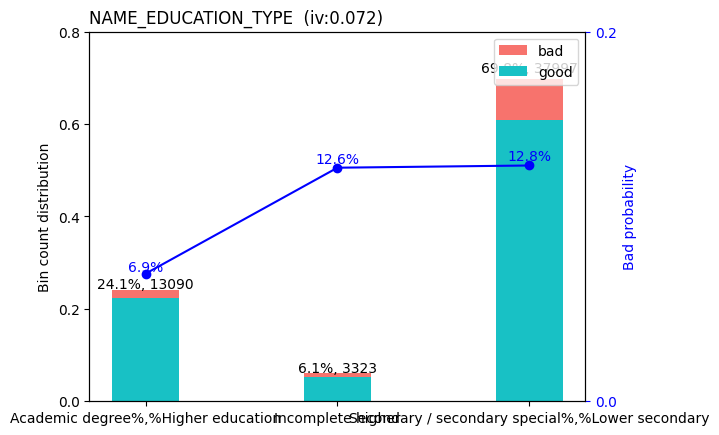

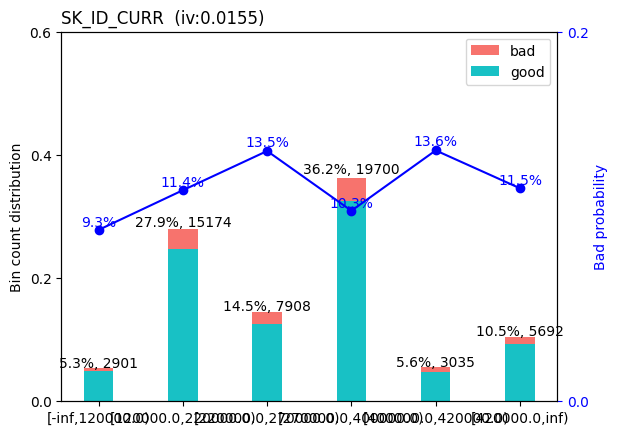

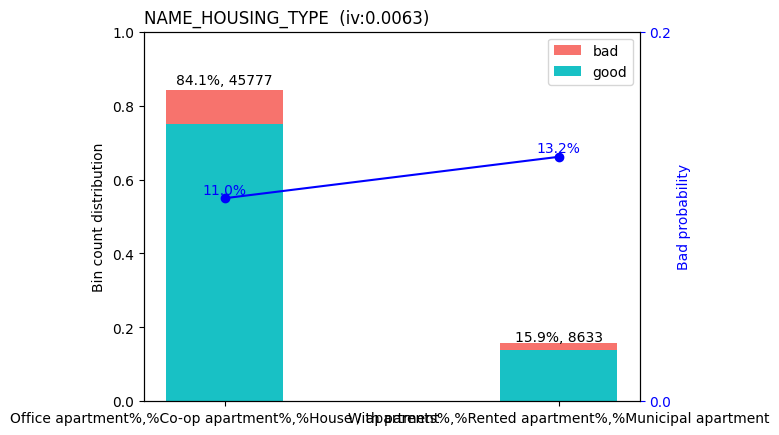

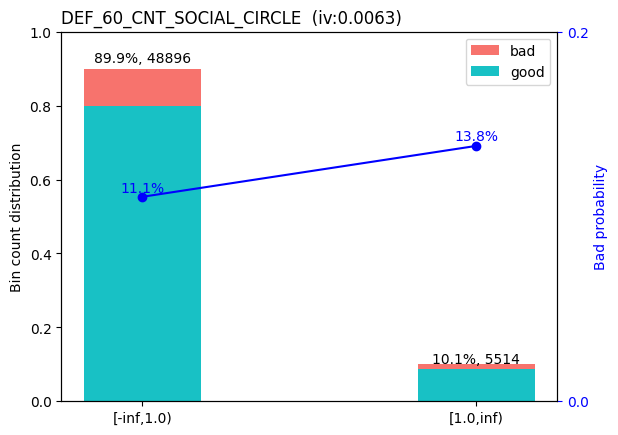

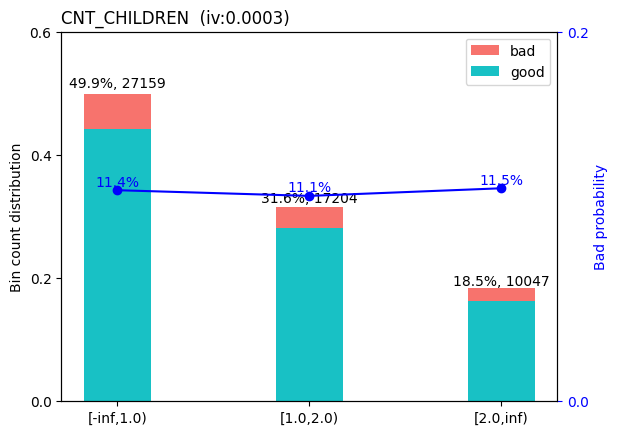

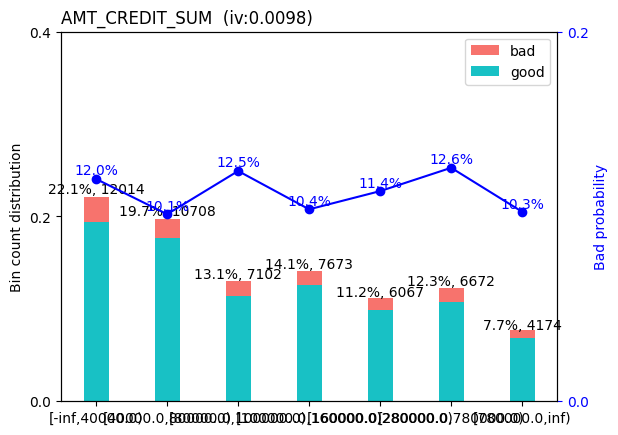

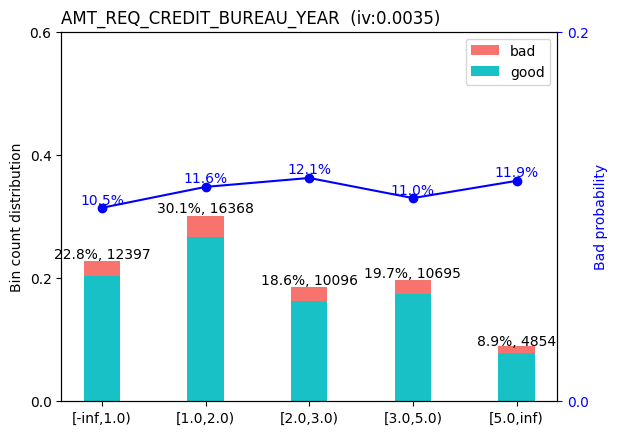

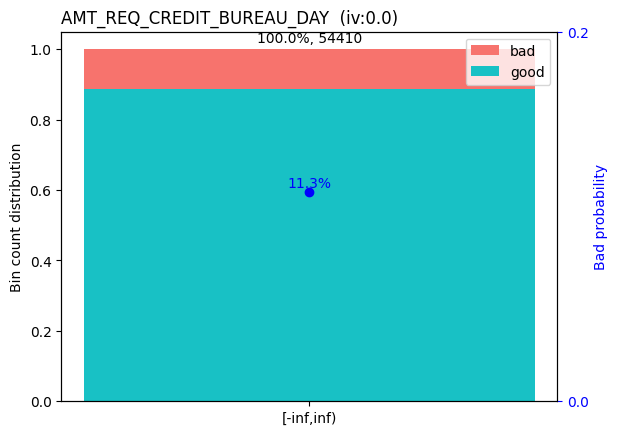

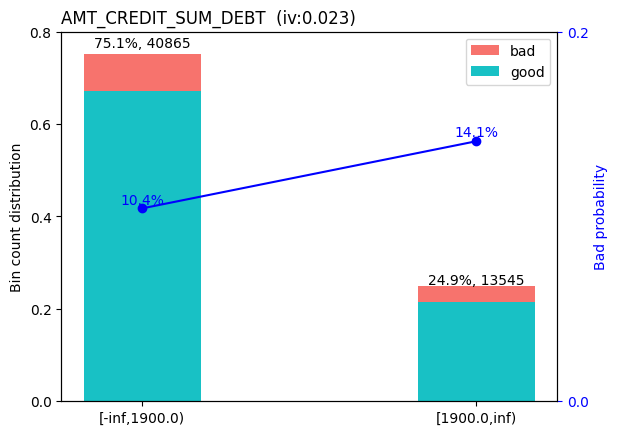

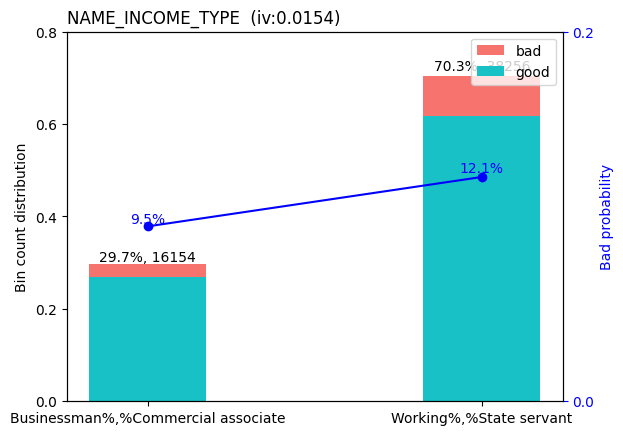

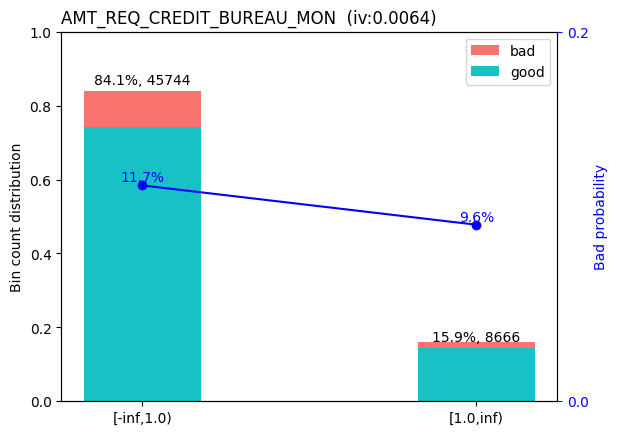

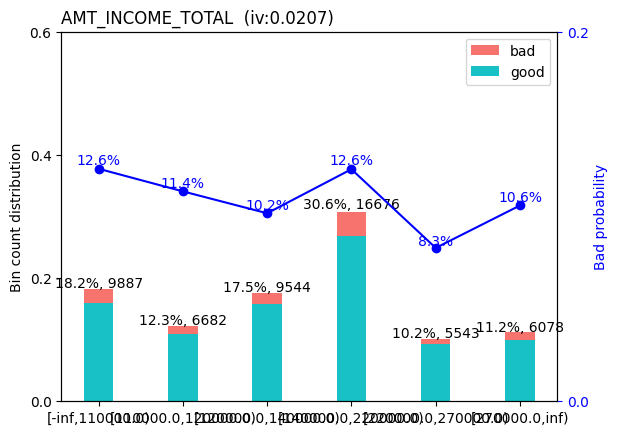

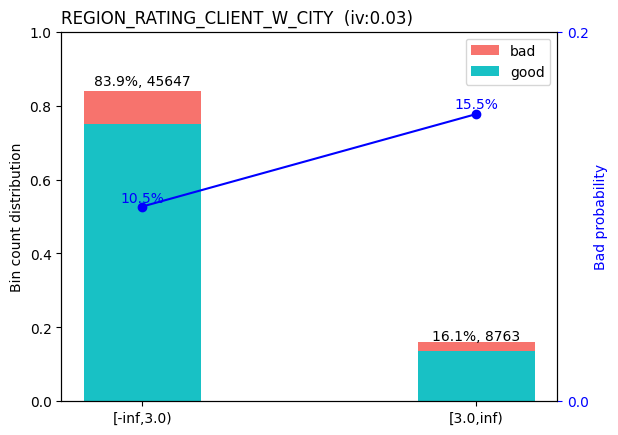

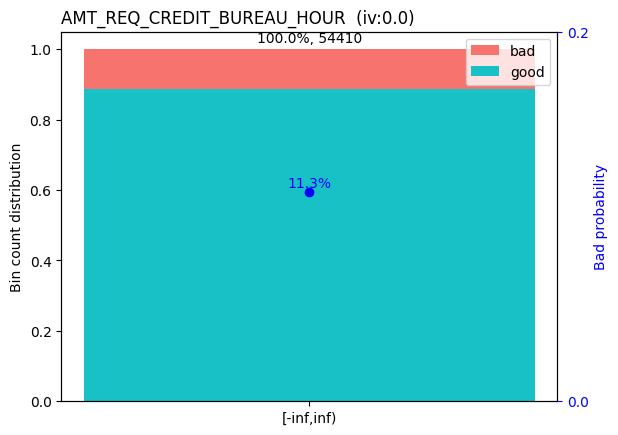

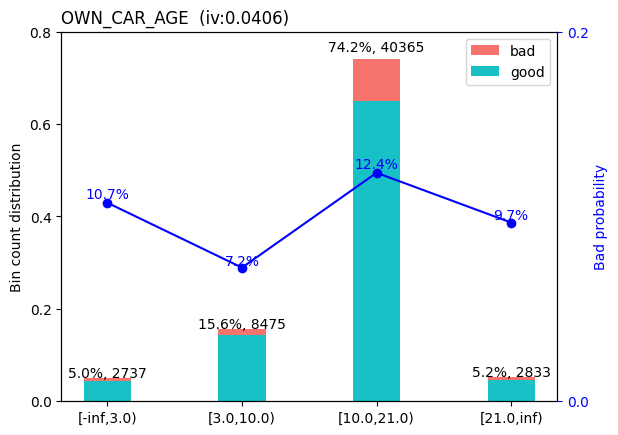

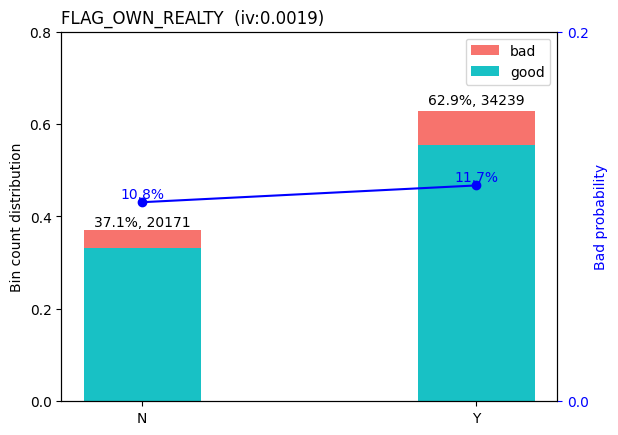

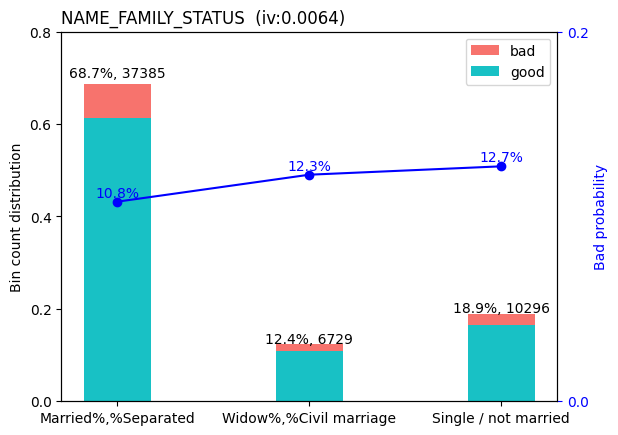

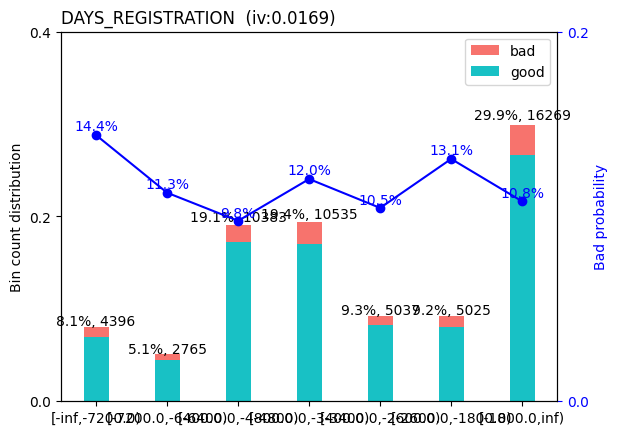

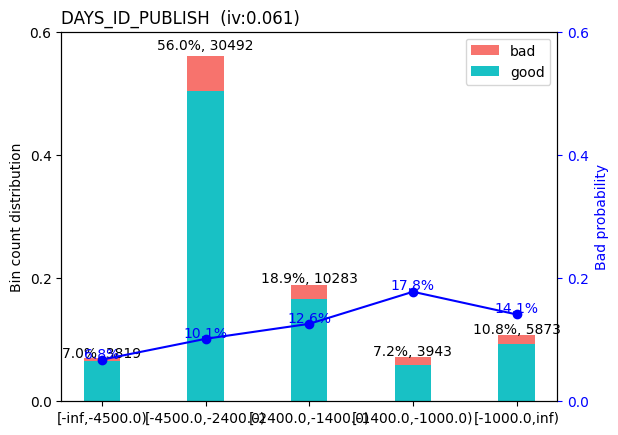

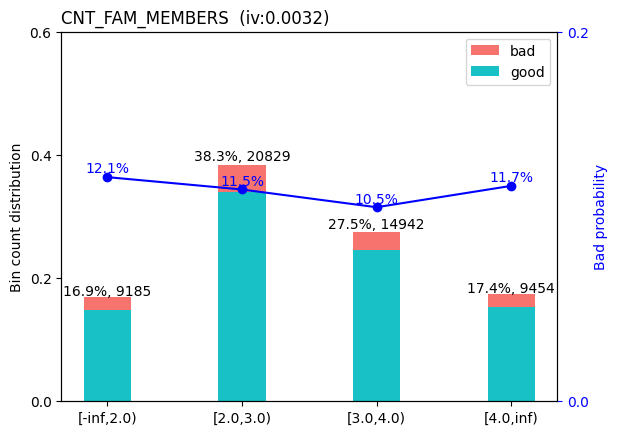

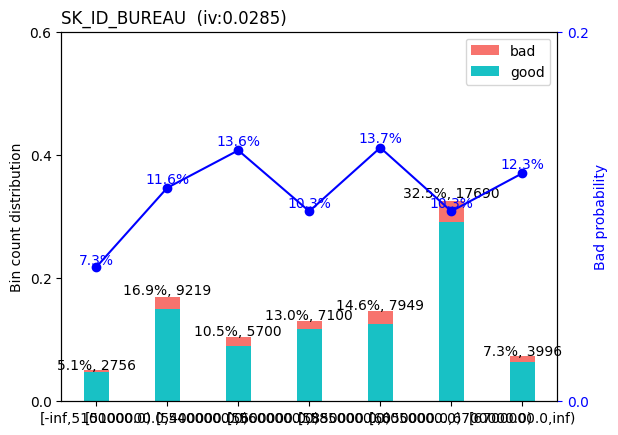

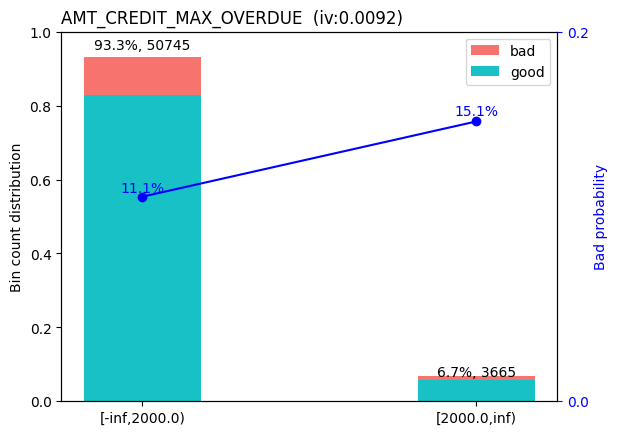

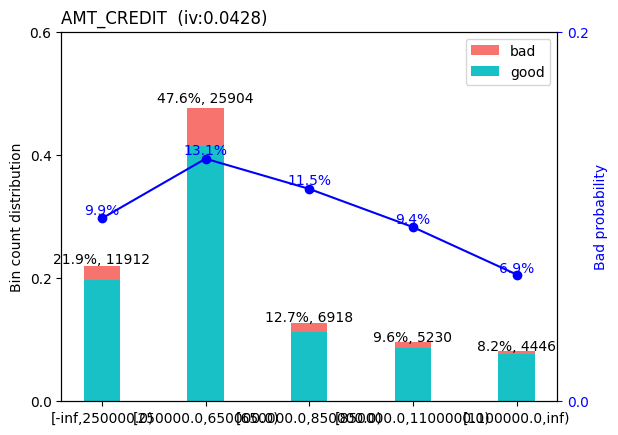

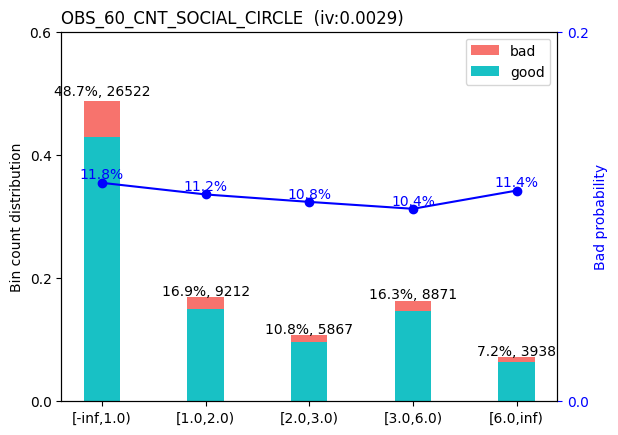

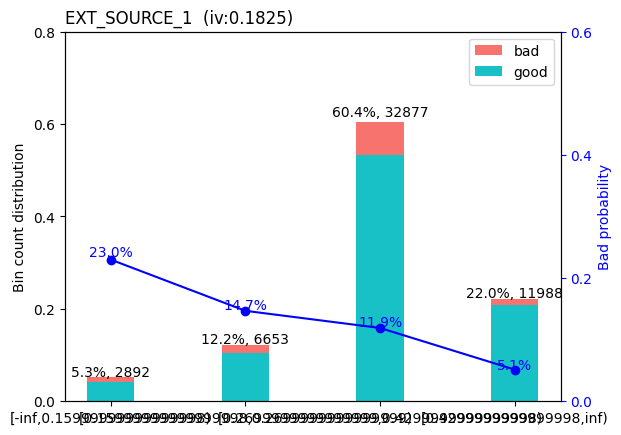

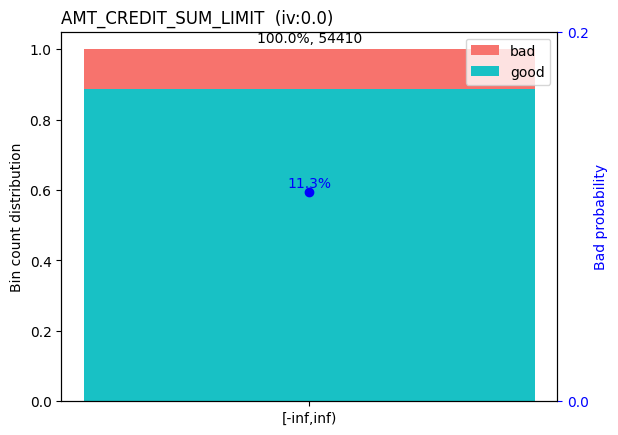

In [ ]:
sc.woebin_plot(bins)

### Extract columns with IV >= 0.1